# Bike Sharing Demand

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Reading and Understanding the Data

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
bikes = pd.read_csv(r"C:\Users\SANJAY TOM\Downloads\day (1).csv")

In [4]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikes.shape

(730, 16)

In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
bikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [10]:
# Categorical columns are:
list(set(bikes.columns) - set(bikes.describe().columns))

['dteday']

In [11]:
# Numerical columns are:
bikes.describe().columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [12]:
#drop unnecessary columns which has nothing to do with count
bikes = bikes.drop(['instant','dteday','casual', 'registered'], axis=1)

In [13]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bikes.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [15]:
#Mapping the season variable
bikes['season']=bikes.season.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

In [16]:
#Mapping the month variable
bikes['mnth']=bikes.mnth.map({1:"Jan",2:"Feb",3:"Mar", 4:"Apr", 5:"May", 6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [17]:
#Mapping the weathersit variable
bikes['weathersit']=bikes.weathersit.map({1: "Clear",2:"Mist + Cloudy",3:"Light Snow + Rain",4:"Heavy Snow + Rain"})

In [18]:
#Mapping the weekday variable
bikes['weekday']=bikes.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

In [19]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

In [21]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### EDA

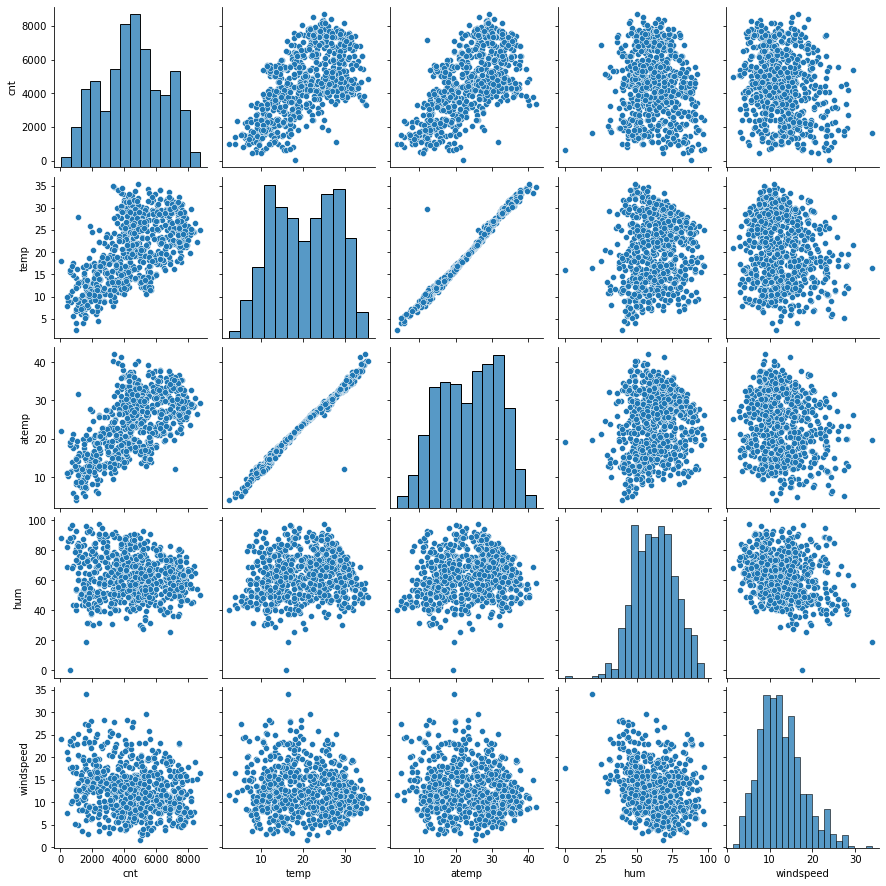

In [22]:
# visualising the numerical variables
sns.pairplot(data=bikes,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**Inference:**
- Looks like the temp and atemp has the highest corelation with the target variable cnt.
- temp and atemp are highly co-related with each other.

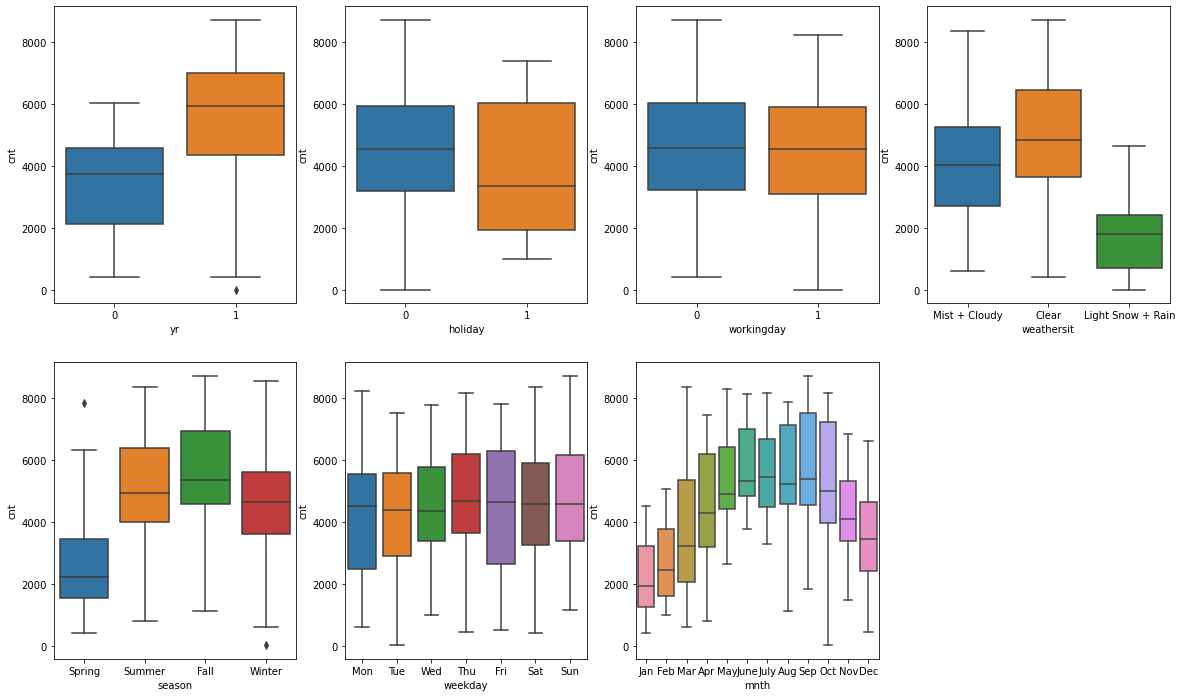

In [23]:
#visualising the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday' , y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.show()

**Inference:**
- Bike Rentals have more bookings during the Fall season than summer season. 
- Bike Rentals have more bookings during Clear weather.
- Bike Rentals have more bookings on Saturday, Wednesday and Thursday.

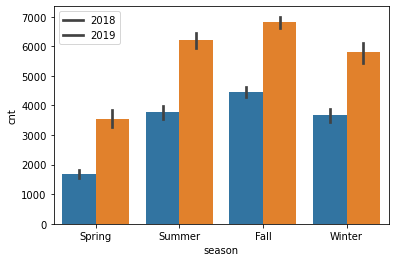

In [24]:
#plotting the barplot to see relation between season and count
sns.barplot('season','cnt',hue='yr',data=bikes)
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:**
Bike Rentals have more bookings during the Fall season. And, in each season the booking count has increased drastically from 2018 to 2019.

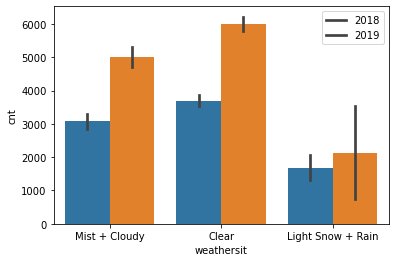

In [25]:
#plotting the barplot to see relation between weathersit and count
sns.barplot('weathersit','cnt',hue='yr',data=bikes)
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:**
Bike Rentals have more bookings during Clear weather. And when compared to previous year, i.e 2018, booking increased for each weather situation in 2019.

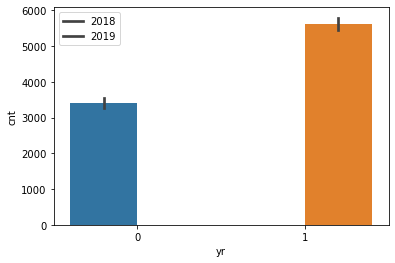

In [26]:
#plotting the barplot to see relation between year and count
sns.barplot('yr','cnt',hue='yr',data=bikes)
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:**
Bike Rentals attracted more number of bookings in 2019 from the previous year, which shows good progress in terms of business.

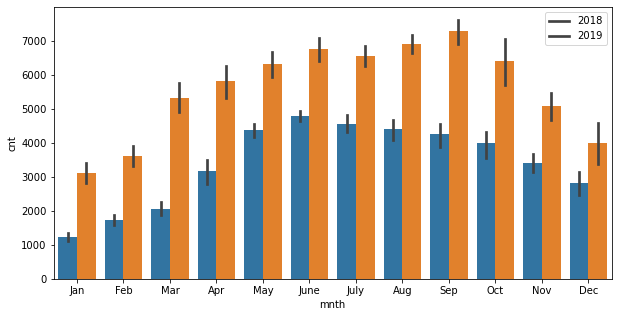

In [27]:
#plotting the barplot to see relation between month and count 
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=bikes)
plt.legend(labels=['2018', '2019'])
plt.show()

**Inference:**
Most of the Bike rental bookings has achieved during the mid of the year i.e. May-Oct.Trend started increasing till the middle of the year i.e.May and then it started decreasing as we approached the end of year. Number of bookings for each month seems to have increased in 2019 when compared to the previous year i.e. 2018.

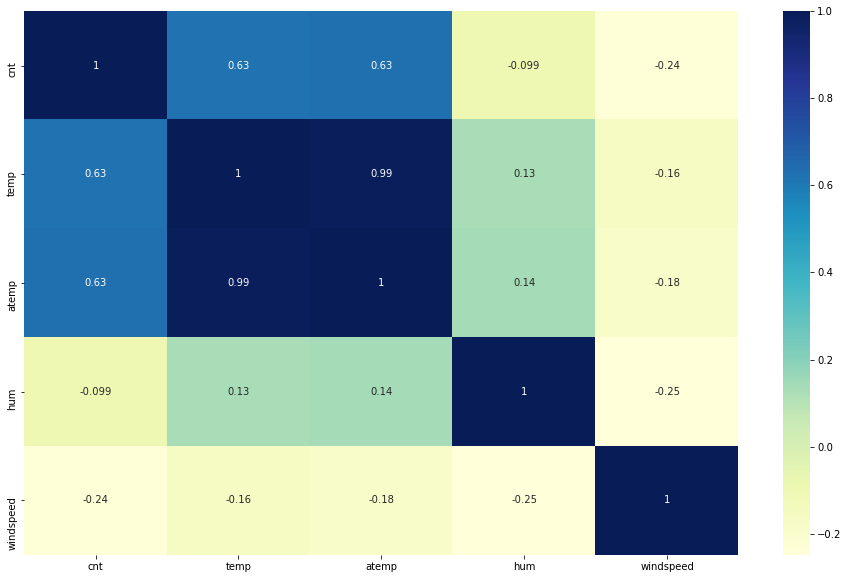

In [28]:
#Heatmap to see correlation between variables
plt.figure(figsize = (16, 10))
sns.heatmap(bikes[['cnt', 'temp', 'atemp', 'hum','windspeed']].corr(),cmap="YlGnBu", annot = True)
plt.show()

**Inference:**
- correlation between temp and atemp is 0.99 which is almost 1
- Let us drop atemp and consider temp

In [29]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop atemp and consider temp

bikes.drop(['atemp'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Dummy Variables

In [30]:
months= pd.get_dummies(bikes['mnth'], drop_first=True)
weekdays= pd.get_dummies(bikes['weekday'], drop_first=True)
weather_sit= pd.get_dummies(bikes['weathersit'], drop_first=True)
seasons= pd.get_dummies(bikes['season'], drop_first=True)

In [31]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [32]:
# adding dummy variables to original dataset
bikes= pd.concat([months,weekdays,weather_sit,seasons,bikes],axis=1)
bikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [33]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aug                730 non-null    uint8  
 1   Dec                730 non-null    uint8  
 2   Feb                730 non-null    uint8  
 3   Jan                730 non-null    uint8  
 4   July               730 non-null    uint8  
 5   June               730 non-null    uint8  
 6   Mar                730 non-null    uint8  
 7   May                730 non-null    uint8  
 8   Nov                730 non-null    uint8  
 9   Oct                730 non-null    uint8  
 10  Sep                730 non-null    uint8  
 11  Mon                730 non-null    uint8  
 12  Sat                730 non-null    uint8  
 13  Sun                730 non-null    uint8  
 14  Thu                730 non-null    uint8  
 15  Tue                730 non-null    uint8  
 16  Wed                730 non

In [34]:
# dropping columns for which dummy variables were created
bikes.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [35]:
bikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [36]:
bikes.shape

(730, 29)

### Splitting the Data into Training and Testing Sets

In [37]:
from sklearn.model_selection import train_test_split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
#Rows and columns after split
print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(219, 29)


### Rescaling the features

There are two common ways of rescaling:

- Min-Max scaling (Normalisation):Between 0 and 1

- Standardisation :mean-0, sigma-1

In [39]:
from sklearn.preprocessing import MinMaxScaler
#Instantiate an object
scaler=MinMaxScaler()

In [40]:
#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

In [41]:
# fit and transform on training data
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [42]:
bikes_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.243137,0.245098,0.24902,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.429398,0.430568,0.43287,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1

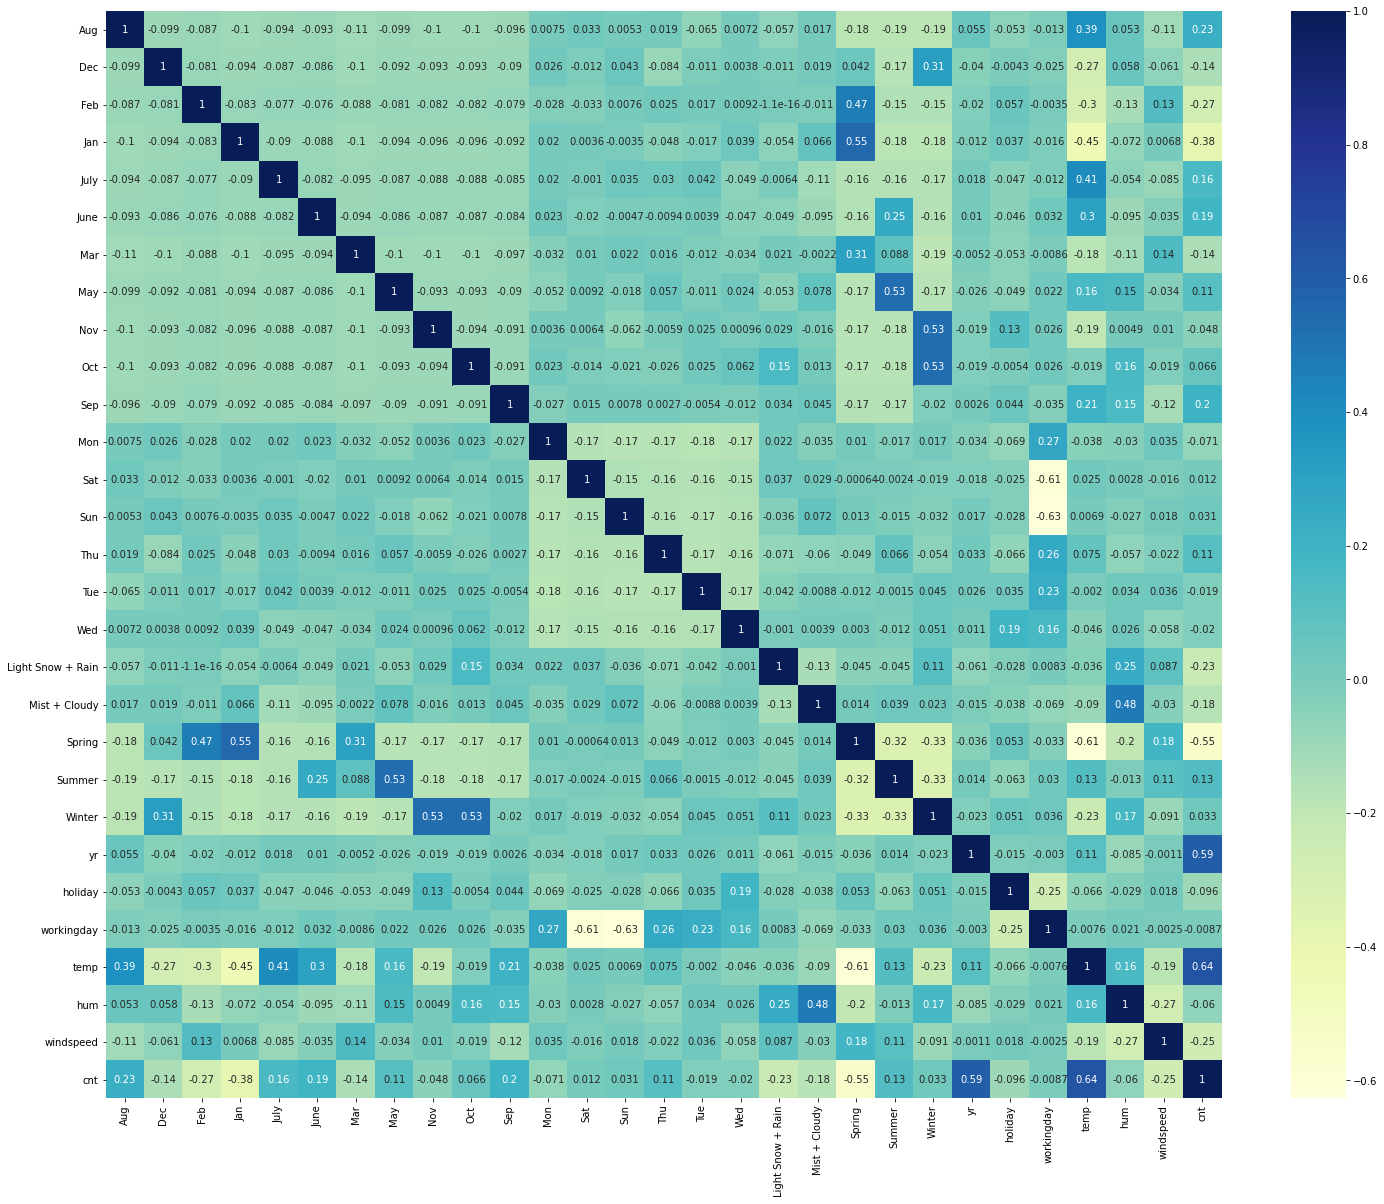

In [43]:
plt.figure(figsize = (25,20))
sns.heatmap(bikes_train.corr(), annot=True, cmap= "YlGnBu")
plt.show()

**Inference:**
From the Heatmap above, we find that cnt seems to have correlation with year variable and temp.Even in August, September months  Similarly,in Spring season with Jan and Feb month, Summer season with may month and Winter season with Oct and Nov month we can see the counts are little high.

### Dividing into X and Y sets for the model building

In [44]:
bikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [45]:
#Divide the data into X and y
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [46]:
X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed
653,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0.395666,0.504508,0.188475


In [47]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Data Modelling

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)



In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)  
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Snow + Rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [50]:
#columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow + Rain',
       'Mist + Cloudy', 'Spring', 'Summer', 'Winter', 'yr', 'holiday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [51]:
#columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

### Building model using statsmodel

In [52]:
#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
#Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
#running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [55]:
#Lets see the summary of the linear model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.34e-189
Time:                        23:45:28   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3202      0.03

In [56]:
X_train_rfe.columns

Index(['const', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow + Rain',
       'Mist + Cloudy', 'Spring', 'Summer', 'Winter', 'yr', 'holiday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [57]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
7,Spring,4.37
9,Winter,4.06
8,Summer,2.81
6,Mist + Cloudy,2.32
10,yr,2.09
3,Nov,1.83
1,Jan,1.75


#### Model 1

In [59]:
# As humidity shows high VIF values hence we can drop it
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [60]:
# Building 1st linear regression model

X_train_lm1 = sm.add_constant(X_train_rfe)
lm1= sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.57e-186
Time:                        23:45:28   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2466      0.03

In [61]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
9,Winter,2.94
7,Spring,2.89
8,Summer,2.23
10,yr,2.07
3,Nov,1.80
1,Jan,1.66
2,July,1.59
6,Mist + Cloudy,1.56


#### Model 2

In [62]:
# We can drop nov variable as it has high p-value and vif
X_train_rfe = X_train_rfe.drop(['Nov'], axis = 1)

In [63]:
# Building 2nd linear regression model

X_train_lm2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.20e-186
Time:                        23:45:29   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2288      0.03

In [64]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.14
12,windspeed,4.62
6,Spring,2.89
7,Summer,2.23
9,yr,2.07
8,Winter,2.06
1,Jan,1.65
2,July,1.59
5,Mist + Cloudy,1.56
3,Sep,1.34


#### Model 3

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [65]:
# We can drop Dec variable as it has high p-value and vif
X_train_rfe = X_train_rfe.drop(['Dec'], axis = 1)

In [66]:
# Building 3rd linear regression model

X_train_lm3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.97e-187
Time:                        23:45:29   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2155      0.03

In [67]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
5,Spring,2.75
6,Summer,2.22
8,yr,2.07
7,Winter,1.79
0,Jan,1.61
1,July,1.59
4,Mist + Cloudy,1.56
2,Sep,1.34


#### Model 4

In [68]:
# We can drop Jan variable as it has high p-value and vif
X_train_rfe = X_train_rfe.drop(['Jan'], axis = 1)

In [69]:
# Building 4th linear regression model

X_train_lm4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.40e-187
Time:                        23:45:29   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1996      0.03

In [70]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,Summer,2.21
4,Spring,2.08
7,yr,2.07
6,Winter,1.79
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow + Rain,1.08


#### Model 5

In [71]:
# We can drop July variable as it has high p-value and vif
X_train_rfe = X_train_rfe.drop(['July'], axis = 1)

In [72]:
# Building 5th linear regression model

X_train_lm5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          7.36e-187
Time:                        23:45:29   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1910      0.03

In [73]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.59
8,temp,3.84
6,yr,2.07
3,Spring,1.99
4,Summer,1.89
5,Winter,1.63
2,Mist + Cloudy,1.54
0,Sep,1.23
1,Light Snow + Rain,1.08
7,holiday,1.04


In [74]:
lm5.params

const                0.190994
Sep                  0.090932
Light Snow + Rain   -0.286002
Mist + Cloudy       -0.080124
Spring              -0.055092
Summer               0.060987
Winter               0.095929
yr                   0.234060
holiday             -0.096865
temp                 0.478177
windspeed           -0.148155
dtype: float64

### Residual Analysis of the train data

In [75]:
X_train_lm5

,const,Sep,Light Snow + Rain,Mist + Cloudy,Spring,Summer,Winter,yr,holiday,temp,windspeed
653,1.0,0,0,0,0,0,1,1,0,0.509887,0.300794
576,1.0,0,0,0,0,0,0,1,0,0.815169,0.264686
426,1.0,0,0,1,1,0,0,1,0,0.442393,0.255342
728,1.0,0,0,0,1,0,0,1,0,0.245101,0.663106
482,1.0,0,0,1,0,1,0,1,0,0.395666,0.188475
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,0,1,0,1,0,1,0,0.824514,0.355596
578,1.0,0,0,0,0,0,0,1,0,0.863973,0.187140
53,1.0,0,0,0,1,0,0,0,0,0.202618,0.111379
350,1.0,0,0,1,0,0,1,0,0,0.248216,0.431816


In [76]:
y_train_pred = lm5.predict(X_train_lm5)

#### Normality of error terms

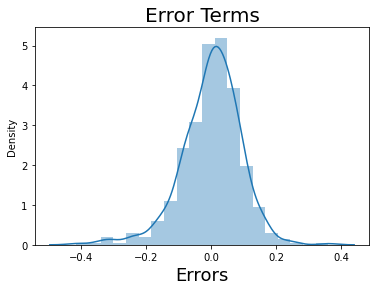

In [77]:
#plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Error terms are following normal distribution

#### Homoscedasticity

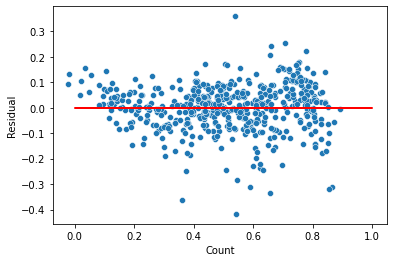

In [78]:
#Validating Homoscedasticity
y_train_pred = lm5.predict(X_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(y_train_pred,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals thus homoscedacity is well preserved.

#### Multicolinearity

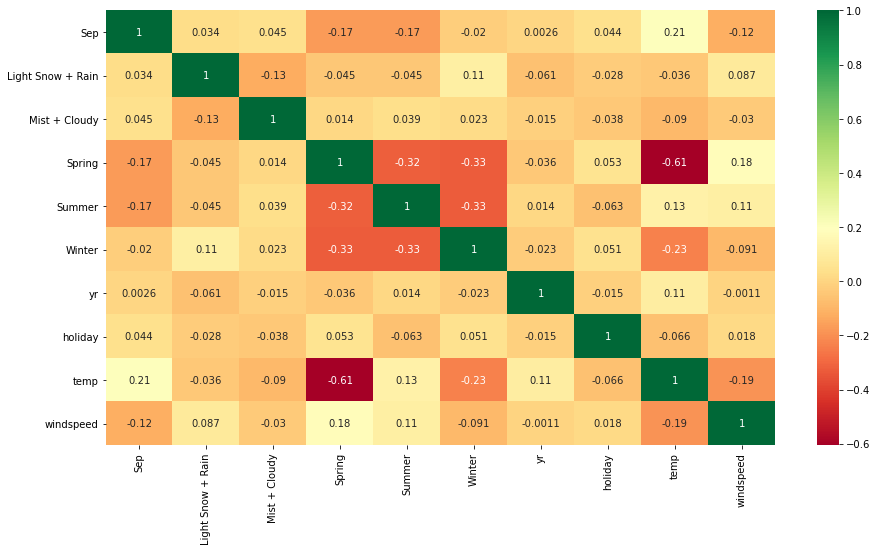

In [79]:
# Validating Multicolinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

There is no multicolinearity as seen from the heatmap above.

#### Linearity

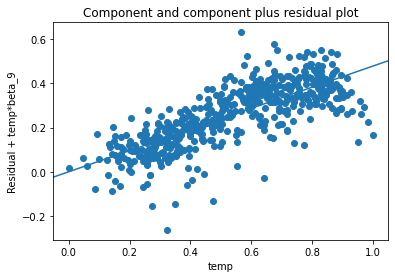

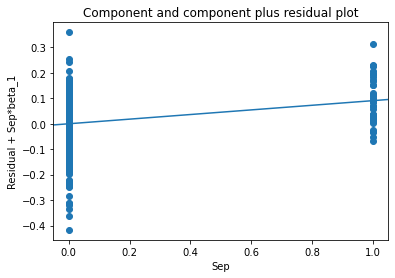

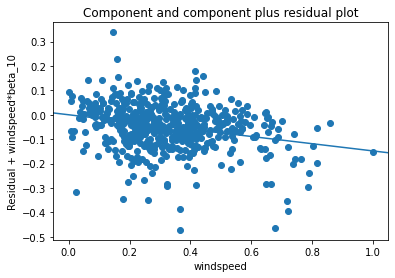

In [80]:
#Validating Linear relationship 

sm.graphics.plot_ccpr(lm5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm5, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lm5, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [81]:
# Applying scaling on the test dataset
num_vars=['temp','hum','windspeed','cnt']
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])
bikes_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [82]:
bikes_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.255708,0.264840,0.232877,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.437258,0.442259,0.423633,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


### Dividing into X_test and y_test

In [83]:
#dividing into X_test and y_test
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [84]:
X_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.831783,0.657364,0.084219
535,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0.901354,0.610133,0.153728
299,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0.511964,0.837699,0.334206
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0.817246,0.314298,0.537414


In [85]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [86]:
X_test.shape

(219, 28)

In [87]:
y_test.shape

(219,)

In [88]:
X_train_rfe.columns

Index(['Sep', 'Light Snow + Rain', 'Mist + Cloudy', 'Spring', 'Summer',
       'Winter', 'yr', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [89]:
#let's use our model to make predictions
col1 = X_train_rfe.columns

In [90]:
#creating X_test dataframe by dropping variables from X_test
X_test= X_test[col1]

In [91]:
#adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

In [92]:
#making predictions on the chosen model
y_pred = lm5.predict(X_test_lm5)

In [93]:
#Calculating R-square value for the test dataset
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8035

#### Adjusted R-square value for test dataset

In [94]:
# n is number of rows in test dataset
n = X_test.shape[0]

In [95]:
# Number of features or independant variables
p = X_test.shape[1]

In [96]:
#Calculating Adjusted-R-square value for the test dataset using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7941

### Model Evaluation

Text(0, 0.5, 'y_pred')

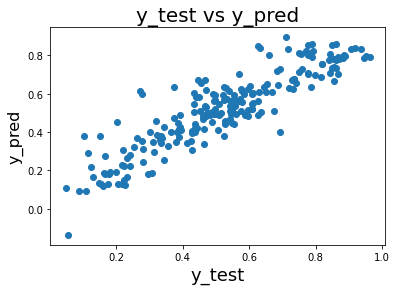

In [97]:
#plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 20) #plot heading
plt.xlabel('y_test', fontsize = 18)          #x-label
plt.ylabel('y_pred', fontsize = 16)          #y-label

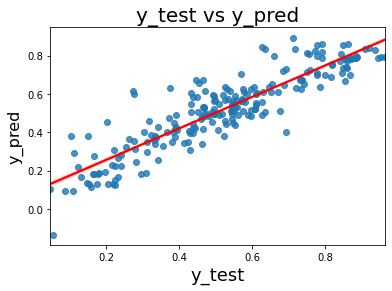

In [98]:
# plotting a Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)   #plot heading
plt.xlabel('y_test', fontsize=18)            #x-label
plt.ylabel('y_pred', fontsize=16)            #y-label
plt.show()

In [99]:
round(lm5.params,4)

const                0.1910
Sep                  0.0909
Light Snow + Rain   -0.2860
Mist + Cloudy       -0.0801
Spring              -0.0551
Summer               0.0610
Winter               0.0959
yr                   0.2341
holiday             -0.0969
temp                 0.4782
windspeed           -0.1482
dtype: float64

- We can see that the equation of our best fitted line is:

$ cnt = 0.1910 + 0.0909  \times  Sep - 0.2860 \times  Light Snow + Rain - 0.0801 \times Mist + Cloudy - 0.0551 \times Spring + 0.0610 \times Summer + 0.0959 \times Winter + 0.2341 \times yr - 0.0969 \times holiday + 0.4782 \times temp - 0.1482 \times windspeed $

- Train R^2 : 0.833
- Train Adjusted R^2 : 0.830
- Test R^2: 0.8035
- Test Adjusted R^2: 0.7941
- Difference in R^2 between train and test: 2.95%
- Difference in adjusted R^2 between Train and test: 3.59% which is less than 5%

**Insights:**
- Temperature could be a crucial factor for the bike rental to maximise the profit for the organisation.
- All the positive coefficients like temp,Summer, Winter indicates that an increase in these values will lead to an increase in the value of cnt.
- Meanwhile, All the negative coefficients like Light Snow + Rain, Mist + Cloudy indicates that an increase in these values will lead to an decrease in the value of cnt.
- As the holiday is having the -ve coefficients it basically means working days have good influence on bike rentals.